In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import BytesIO

Shape de la imagen: (225, 225, 3).
Columnas (Ancho): 225
Filas (Altura): 225
Canales: 3
Tipo de dato del array: uint8


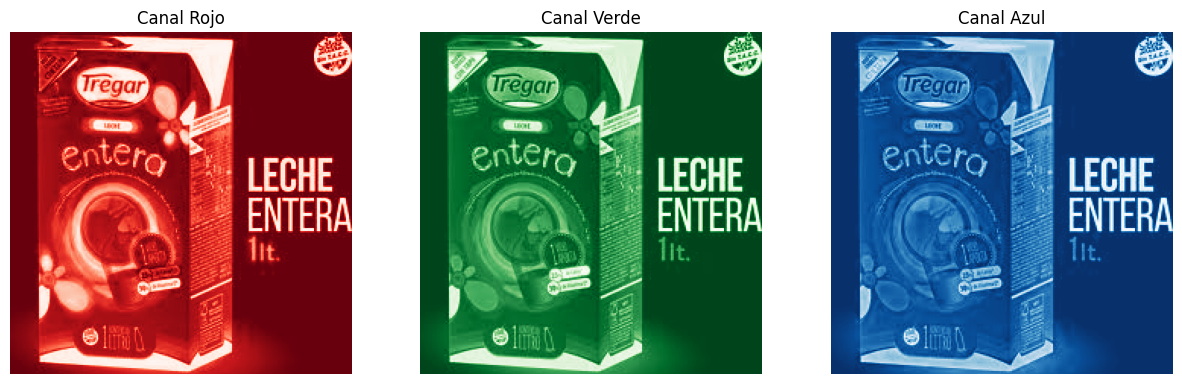

In [ ]:


"""# Función auxiliar para leer una imagen desde una URL con OpenCV
def read_image_from_url(url):
    response = requests.get(url)
    image = np.array(bytearray(response.content), dtype=np.uint8)
    image = cv2.imdecode(image, cv2.IMREAD_COLOR)  # Convertir bytes a imagen
    return image"""

# URL de la imagen que deseas descargar
image_url = "https://raw.githubusercontent.com/jpmanson/tuia-unr/main/images/big_buck_bunny.jpg"

# Leer la imagen
image = imagen = cv2.imread('/content/descarga.jpg')

# OpenCV maneja imágenes en formato BGR, convertir a RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Mostramos la información de la imagen
print(f"Shape de la imagen: {image_rgb.shape}.")
print(f"Columnas (Ancho): {image_rgb.shape[1]}")
print(f"Filas (Altura): {image_rgb.shape[0]}")
print(f"Canales: {image_rgb.shape[2]}")
print(f"Tipo de dato del array: {image_rgb.dtype}")

# Descomponer la imagen en los canales R, G, B
R, G, B = image_rgb[:,:,0], image_rgb[:,:,1], image_rgb[:,:,2]

# Mostrar cada canal de color
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].imshow(R, cmap='Reds')
axs[0].set_title('Canal Rojo')
axs[0].axis('off')

axs[1].imshow(G, cmap='Greens')
axs[1].set_title('Canal Verde')
axs[1].axis('off')

axs[2].imshow(B, cmap='Blues')
axs[2].set_title('Canal Azul')
axs[2].axis('off')

plt.show()

Shape de la imagen original (RGB): (225, 225, 3)
Tipo de dato del array de la imagen original: uint8
Shape de la imagen en escala de grises: (225, 225)
Tipo de dato del array de la imagen en escala de grises: uint8


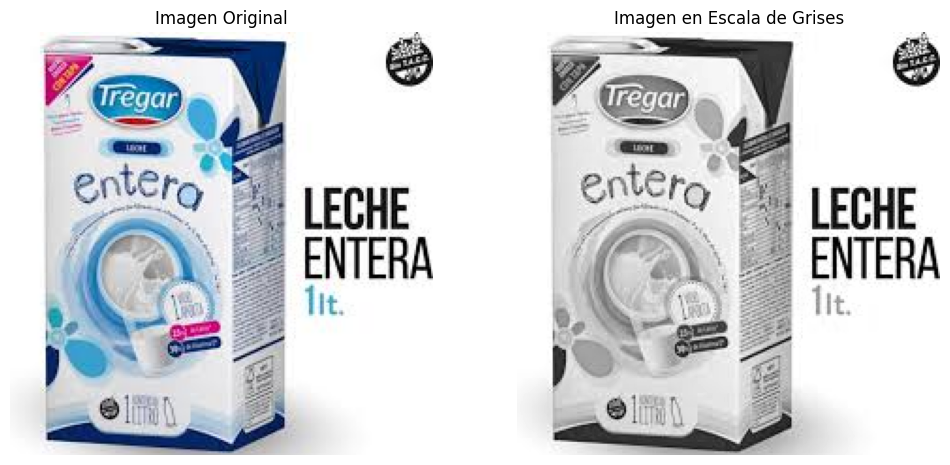

In [ ]:


# Convertir la imagen a escala de grises
image_gray = cv2.cvtColor(image_rgb, cv2.COLOR_BGR2GRAY)

# Imprimir el shape y el tipo de dato del array de la imagen original y en escala de grises
print(f"Shape de la imagen original (RGB): {image_rgb.shape}")
print(f"Tipo de dato del array de la imagen original: {image_rgb.dtype}")
print(f"Shape de la imagen en escala de grises: {image_gray.shape}")
print(f"Tipo de dato del array de la imagen en escala de grises: {image_gray.dtype}")

# Mostrar ambas imágenes, original y en escala de grises
plt.figure(figsize=(12, 6))

# Imagen original
plt.subplot(1, 2, 1)
plt.imshow(image_rgb)
plt.title("Imagen Original")
plt.axis('off')

# Imagen en escala de grises
plt.subplot(1, 2, 2)
plt.imshow(image_gray, cmap='gray')
plt.title("Imagen en Escala de Grises")
plt.axis('off')

plt.show()

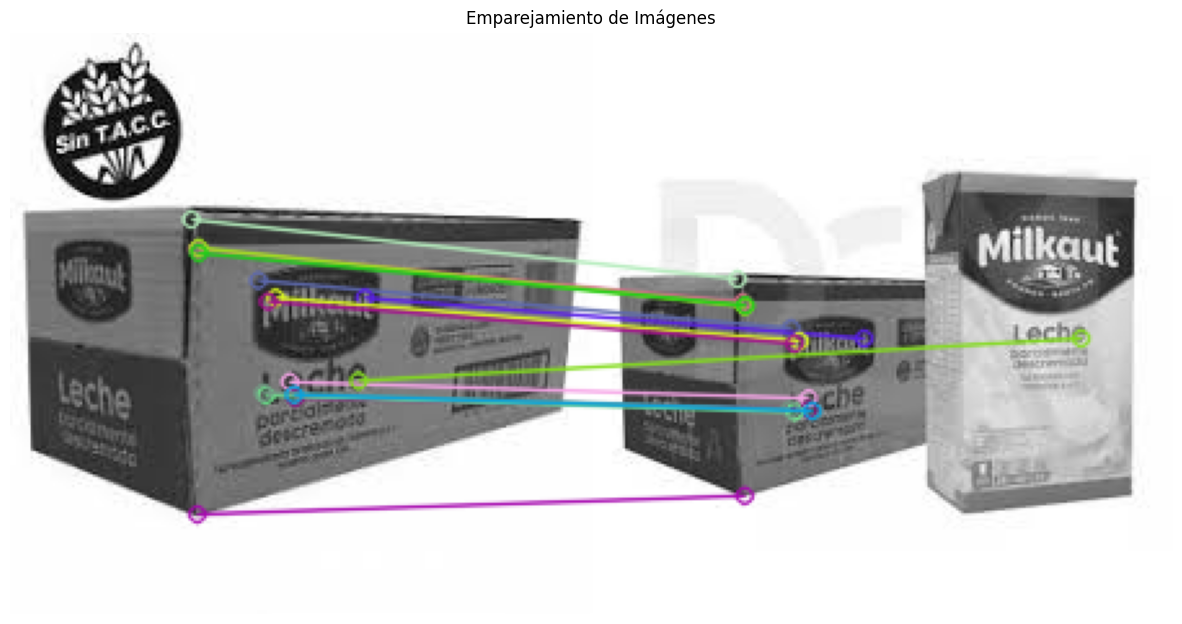

In [ ]:
"""!wget "https://mywowo.net/media/images/cache/barcellona_parc_guell_02_visita_jpg_1200_630_cover_85.jpg" -O salamandra1.jpg
!wget "https://i.pinimg.com/originals/a4/57/c5/a457c577a58f3715ce1b53d2b76993c9.jpg" -O salamandra2.jpg"""



# Cargar las imágenes
image1 = cv2.imread('/content/cajagrade.jpg', cv2.IMREAD_GRAYSCALE)  # Reemplaza con la ruta a tu imagen
image2 = cv2.imread('/content/cajasleche.jpg', cv2.IMREAD_GRAYSCALE)  # Reemplaza con la ruta a otra imagen

# Inicializar ORB
orb = cv2.ORB_create()

# Detectar keypoints y calcular descriptores
keypoints1, descriptors1 = orb.detectAndCompute(image1, None)
keypoints2, descriptors2 = orb.detectAndCompute(image2, None)

# Crear un objeto BFMatcher para encontrar las coincidencias
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Encontrar coincidencias
matches = bf.match(descriptors1, descriptors2)

# Ordenar las coincidencias en orden de distancia (cuanto más baja, mejor)
matches = sorted(matches, key=lambda x:x.distance)

# Dibujar las primeras 15 coincidencias
matched_img = cv2.drawMatches(image1, keypoints1, image2, keypoints2, matches[:15], outImg=None, flags=2)

# Ajustar el tamaño de la figura de matplotlib
plt.figure(figsize=(15, 20))
plt.imshow(cv2.cvtColor(matched_img, cv2.COLOR_BGR2RGB))
plt.title('Emparejamiento de Imágenes')
plt.axis('off')
plt.show()

In [2]:
import cv2 as cv

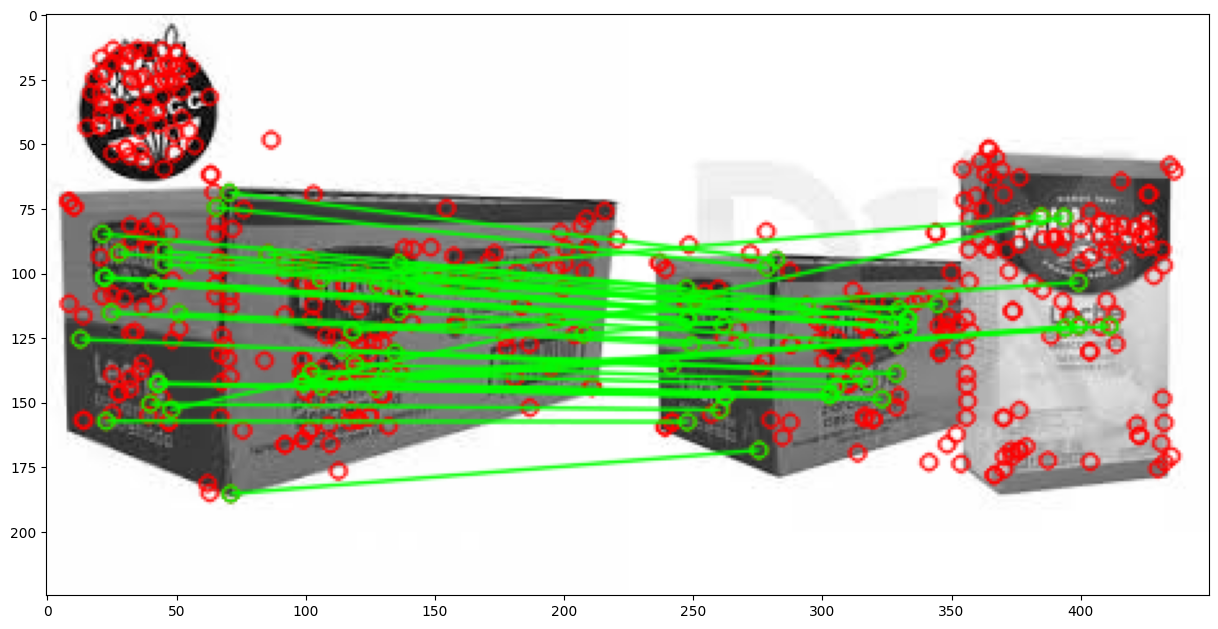

(<matplotlib.image.AxesImage at 0x7811f8fbd690>, None)

In [ ]:

img1 = cv.imread('/content/cajagrade.jpg', cv.IMREAD_GRAYSCALE)          # Imagen de consulta (queryImage)
img2 = cv.imread('/content/cajasleche.jpg', cv.IMREAD_GRAYSCALE) # Imagen de entrenamiento (trainImage)

# Iniciar el detector SIFT
sift = cv.SIFT_create()

# Encontrar los keypoints y descriptores con SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Parámetros FLANN
FLANN_INDEX_KDTREE = 1
index_params = dict(algorithm=FLANN_INDEX_KDTREE, trees=5)
search_params = dict(checks=50)  # o pasar un diccionario vacío

# Iniciar FLANN matcher
flann = cv.FlannBasedMatcher(index_params, search_params)

# Realizar emparejamientos kNN
matches = flann.knnMatch(des1, des2, k=2)

# Necesitamos dibujar solo los buenos emparejamientos, por lo que creamos una máscara
matchesMask = [[0, 0] for i in range(len(matches))]

# Test de proporción según el artículo de Lowe (https://www.robots.ox.ac.uk/~vgg/research/affine/det_eval_files/lowe_ijcv2004.pdf)
for i, (m, n) in enumerate(matches):
    if m.distance < 0.7 * n.distance:
        matchesMask[i] = [1, 0]

# Parámetros de dibujo para los emparejamientos
draw_params = dict(matchColor=(0, 255, 0),  # color de los emparejamientos
                   singlePointColor=(255, 0, 0),  # color de los puntos individuales
                   matchesMask=matchesMask,  # máscara para seleccionar emparejamientos
                   flags=cv.DrawMatchesFlags_DEFAULT)

# Dibujar los emparejamientos kNN
img3 = cv.drawMatchesKnn(img1, kp1, img2, kp2, matches, None, **draw_params)
plt.figure(figsize=(15, 20))
# Mostrar la imagen resultante
plt.imshow(img3), plt.show()

Descargamos el video de youtube

In [1]:
!pip install pytube
!apt update && apt install -y handbrake-cli

from pytube import YouTube




Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [110 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [119 kB]
Hit:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:5 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:7 https://ppa.launchpadcontent.net/c2d4u.team/c2d4u4.0+/ubuntu jammy InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Fetched 229 kB in 1s (183 kB/s)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
53 packages can be upgraded. Run 'apt list --upgradable' to see them.
Reading package lists... Done
Building dependenc

In [6]:
# URL del video de YouTube que deseas descargar
url = "https://www.youtube.com/watch?v=XXdPNnS_XAA"

yt = YouTube(url)

# Seleccionamos la mejor calidad disponible para descargar
video = yt.streams.filter(progressive=True, file_extension="mp4", res="720p").first()

output_filename = "highway.mp4"
video.download(output_filename)

print("Descarga completada.")


Descarga completada.


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [8]:
!ffmpeg -y -i autos.mp4 -vf "scale=600:-1" -an -t 30 autos_600.mp4

ffmpeg version 4.4.2-0ubuntu0.22.04.1 Copyright (c) 2000-2021 the FFmpeg developers
  built with gcc 11 (Ubuntu 11.2.0-19ubuntu1)
  configuration: --prefix=/usr --extra-version=0ubuntu0.22.04.1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --enable-gnutls --enable-ladspa --enable-libaom --enable-libass --enable-libbluray --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libgme --enable-libgsm --enable-libjack --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-libpulse --enable-librabbitmq --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libsrt --enable-libssh --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enab

In [9]:
!pip install -q mediapy

import mediapy as media


In [11]:
url = "autos_600.mp4"
video = media.read_video(url)
media.show_video(video)


In [ ]:
def process_image(new_image, prev_image, **kwargs):
    new_image_float = new_image.astype(np.float32)
    new_image_float *=


